In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

# 1- We need to  Load the Image.

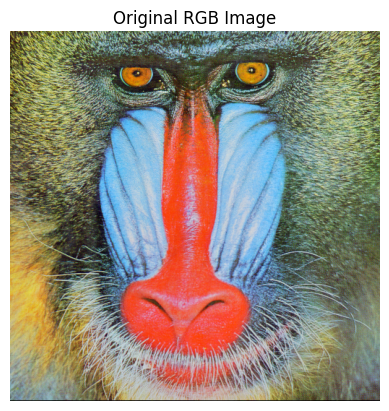

In [7]:
img_path = r"C:\Users\bbuser\Desktop\DataScience\DataScience-Brain-Bytes\Team_members\from_shihab\Imges\baboon.png"

img_bgr = cv2.imread(img_path )


img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()

# 2- Plot Histograms for Each Color Channel

### we want to visualize how pixel intensities are distributed in each of the RGB (Red, Green, Blue) channels of the image. This is done using histograms.

#### 1- Split the RGB channels

In [8]:
red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]
blue_channel = img_rgb[:, :, 2]

#### 2- Plot histograms

C:\Users\bbuser\AppData\Local\Temp\ipykernel_31840\2525835675.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(red_channel.ravel(), 256, [0, 256], color='red')


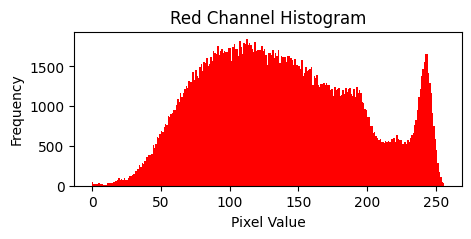

C:\Users\bbuser\AppData\Local\Temp\ipykernel_31840\2525835675.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(green_channel.ravel(), 256, [0, 256], color='green')


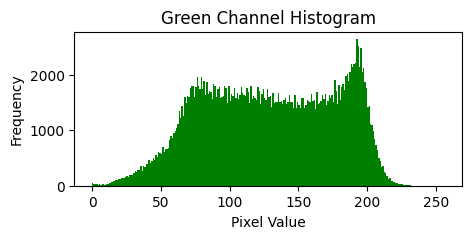

C:\Users\bbuser\AppData\Local\Temp\ipykernel_31840\2525835675.py:17: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(blue_channel.ravel(), 256, [0, 256], color='blue')


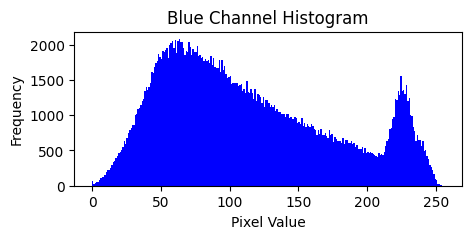

In [16]:
plt.figure(figsize=(5, 2))
plt.hist(red_channel.ravel(), 256, [0, 256], color='red')
plt.title("Red Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(5, 2))
plt.hist(green_channel.ravel(), 256, [0, 256], color='green')
plt.title("Green Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(5, 2))
plt.hist(blue_channel.ravel(), 256, [0, 256], color='blue')
plt.title("Blue Channel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

#### This histogram shows how many pixels in an image have a certain intensity (brightness) value. Intensity values range from 0 (black) to 255 (white) for 8-bit images. You plot how many pixels have each intensity from 0 to 255.

# 3- Adjust Brightness and Contrast

## Make the image brighter and/or more contrasted to improve visibility of details.

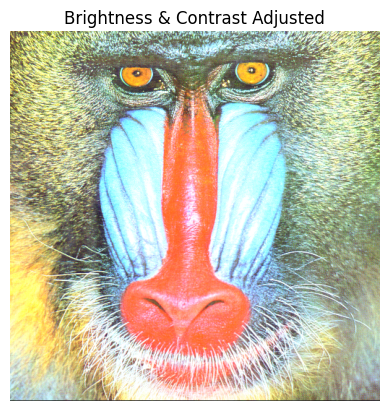

In [17]:
bright_contrast = cv2.convertScaleAbs(img_rgb, alpha=1.2, beta=30)


plt.imshow(bright_contrast)
plt.title("Brightness & Contrast Adjusted")
plt.axis('off')
plt.show()

#### what's happening here :

#### The dark areas lighter.

#### Improves the visibility of objects.

#### Useful when images look too dark or washed out.

# 4- Histogram Equalization (Per Channel using YUV)

### Contrast by spreading out pixel intensities evenly.

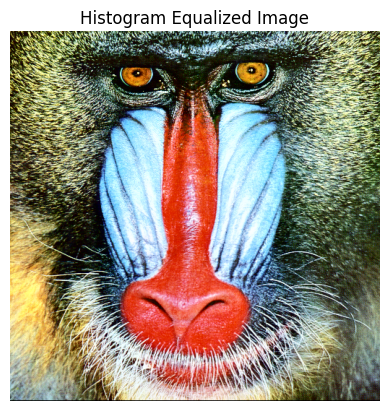

In [18]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
equalized_img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)


plt.imshow(equalized_img)
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

### What's happening:

### Improves contrast across the image automatically.

### It's useful for low-contrast or poor lighting .

# 5- Convert to Grayscale and Show Histogram

### Prepare for binary segmentation by simplifying the image to 1 channel

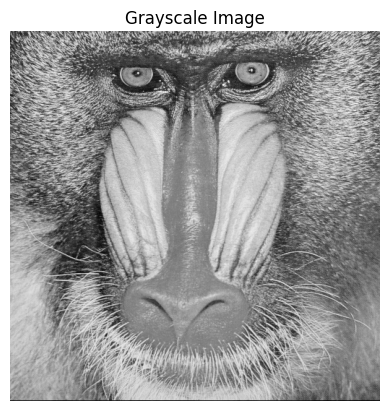

C:\Users\bbuser\AppData\Local\Temp\ipykernel_31840\1093166681.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray.ravel(), 256, [0, 256])


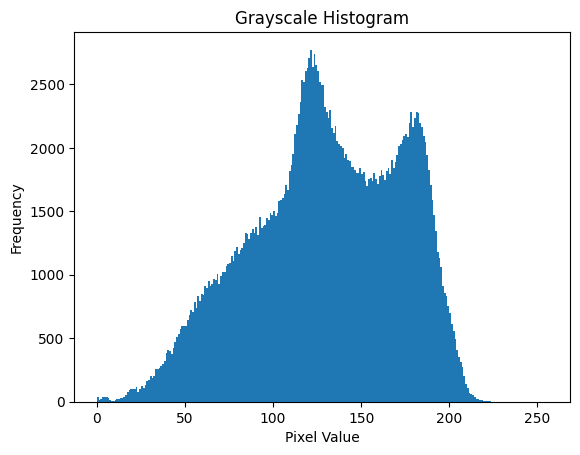

In [19]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

plt.hist(gray.ravel(), 256, [0, 256])
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


### What that's mean:

### Grayscale image contains intensity values only.

### Histogram shows brightness distribution — useful for thresholding.

# 6- Apply Otsu’s Thresholding

### We separate the foreground (object) from the background by converting grayscale to binary (black & white).

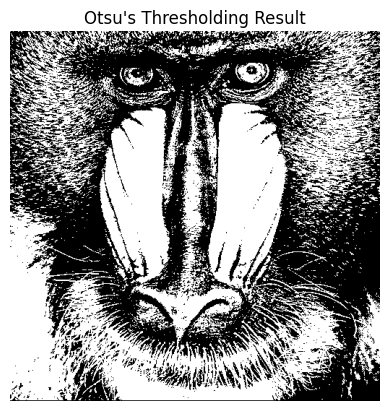

In [21]:
_, otsu_result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.imshow(otsu_result, cmap='gray')
plt.title("Otsu's Thresholding Result")
plt.axis('off')
plt.show()